In [1]:
from pymilvus import MilvusClient
from tqdm import tqdm
import numpy as np

client = MilvusClient(uri="http://localhost:19530", user="root", password="Milvus")

In [2]:
random_vector = np.random.rand(256)

res = client.search(
    collection_name="app",  # target collection
    data=[random_vector],  # query vectors
    limit=50,  # number of returned entities
    output_fields=[
        "vector",
        "artifactId",
        "packageName",
        "groupId",
        "name",
    ],  # specifies fields to be returned
)

print(len(res[0]))

50


In [3]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

matrix = []
names = []

for row in res[0]:
    matrix.append(row["entity"]["vector"])
    names.append(row["entity"]["name"])
matrix = np.array(matrix)

pca = PCA(n_components=50)

trunc_matrix = pca.fit_transform(matrix)

tsne_matrix = TSNE(
    n_components=2, learning_rate="auto", init="random", perplexity=3
).fit_transform(trunc_matrix)

In [ ]:
import pandas as pd

df = pd.DataFrame(columns=["name", "x"])

index = 0
for row in tsne_matrix:
    row = pd.DataFrame({"name": [names[index]], "x": [row[0]], "y": [row[1]]})
    df = pd.concat([df, row], axis=0)
    index += 1

display(df)

C:\Users\I567766\AppData\Local\Temp\ipykernel_23220\3935644271.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, row], axis=0)


,name,x,y
0,PercentCodec,141.753433,-96.518188
0,Base16,28.252844,-12.306800
0,ResourceConstants,99.259224,-70.909271
0,Sha2Crypt,59.204674,150.242691
0,Resources,41.646729,50.402172
0,RFC1522Codec,130.981186,-78.110214
0,BinaryCodec,21.864799,41.606640
0,Base32,40.503540,-5.229543
0,Base16InputStream,113.114052,-181.908859
0,Base32InputStream,90.071907,38.440186


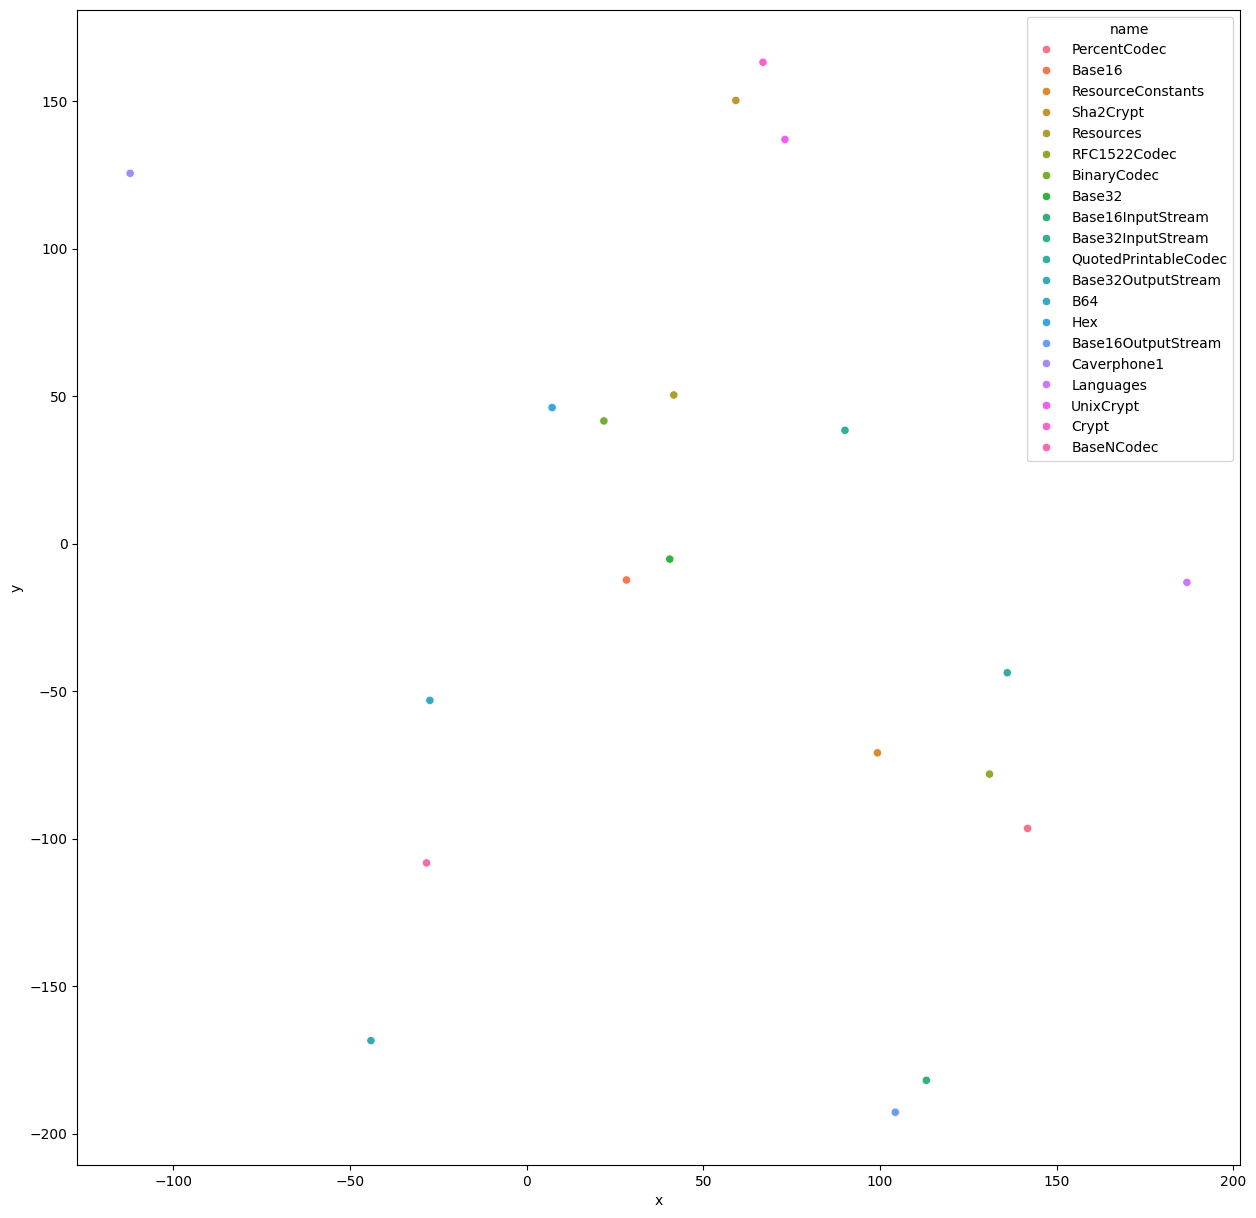

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.scatterplot(x="x", y="y", data=df[:20], hue="name")

plt.show()

In [ ]:
import plotly.express as px

px.scatter(df, x="x", y="y", hover_name="name")